In [431]:
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time
from PIL import Image, ImageDraw
%matplotlib inline


In [447]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [448]:
#load test iamge
test1 = cv2.imread('IMG_2646.JPG')
#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

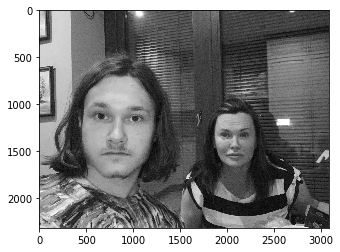

In [449]:
#if you have matplotlib installed then
plt.imshow(gray_img, cmap='gray')


In [450]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [451]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)

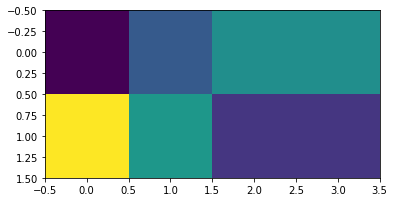

In [452]:
plt.imshow(faces)

In [453]:
faces

array([[ 310,  734, 1048, 1048],
       [1809, 1105,  548,  548]], dtype=int32)

In [454]:
print('Faces found: ', len(faces))

Faces found:  2


In [440]:

for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 0, 255), 10)

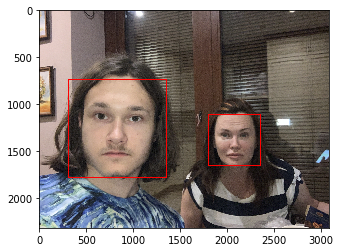

In [441]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test1))

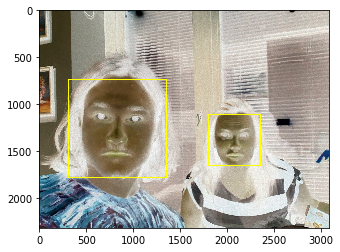

In [442]:
test2 = cv2.bitwise_not(test1)
plt.imshow(test2)

In [443]:
faces[0].tolist()

[310, 734, 1048, 1048]

310 734 1048 1048


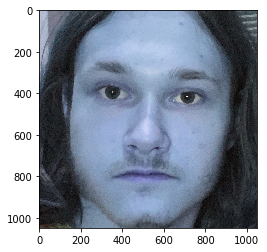

1809 1105 548 548


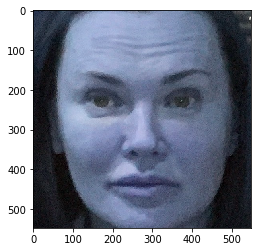

In [455]:
crops = []
for (x, y, w, h) in faces:
    crop_img = test1[y:y+h, x:x+w].copy()
    crops.append(crop_img)
    plt.imshow(crop_img)
    print(x, y, w, h)
    plt.show()
    

[310, 734, 1048, 1048]


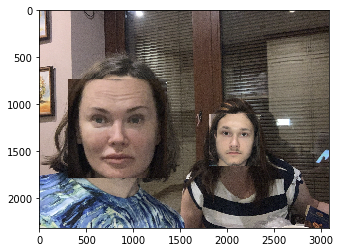

In [456]:
for (x, y, w, h) in faces:
    coords = {'A': x,'B': y,'C': w,'D':h}
    co = []
    co += [coords[key] for key in sorted(coords)]
    
    if co == faces[0].tolist():
        print(co)
        crop1 = cv2.resize(crops[1],(w,h))
        test1[y:y+h, x:x+w] = crop1.copy()
    else:
        crop2 = cv2.resize(crops[0],(w,h))
        test1[y:y+h, x:x+w] = crop2.copy()
    plt.imshow(convertToRGB(test1))
    
    

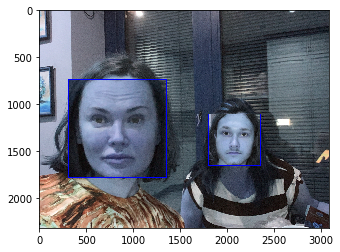

In [446]:
plt.imshow(test1)

In [312]:
faces2 = haar_face_cascade.detectMultiScale(gray_img2, scaleFactor=1.3, minNeighbors=5)

In [313]:
for (x, y, w, h) in faces2:
    cv2.rectangle(test2, (x, y), (x+w, y+h), (0, 0, 255), 1)

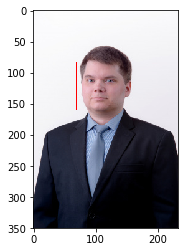

In [314]:
plt.imshow(convertToRGB(test2))

In [356]:
cv2.imwrite('background.png', convertToRGB(test1))
cv2.imwrite('insertion.png', crop_img)

True

In [316]:
cv2.imwrite('background1.png', convertToRGB(test1))
cv2.imwrite('insertion1.png', crop_img1)

True

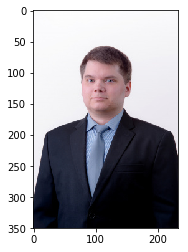

In [364]:
image = Image.open('IMG_9305.jpeg')
ins = Image.open('insertion.png')
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 


plt.imshow(image_1)

In [359]:
for (x, y, w, h) in faces:    
    image.paste(ins, (x,y,x+w,y+h))
    plt.imshow(image)

ValueError: images do not match